# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['jumla',
 'norman wells',
 'severo-kurilsk',
 'hasaki',
 'pacific grove',
 'nikolskoye',
 'chapais',
 'rikitea',
 'qaanaaq',
 'khatanga',
 'hobart',
 'punta arenas',
 'illoqqortoormiut',
 'san patricio',
 'airai',
 'hermanus',
 'sistranda',
 'mount isa',
 'fort nelson',
 'beringovskiy',
 'batagay-alyta',
 'dikson',
 'port alfred',
 'rio grande',
 'mao',
 'faanui',
 'saint anthony',
 'castro',
 'butaritari',
 'barentsburg',
 'nishihara',
 'kharp',
 'machali',
 'thompson',
 'hithadhoo',
 'hilo',
 'cururupu',
 'ushuaia',
 'bengkulu',
 'mataura',
 'guerrero negro',
 'cape town',
 'pakdasht',
 'katsuura',
 'tiksi',
 'pevek',
 'charters towers',
 'jasper',
 'vestmannaeyjar',
 'faya',
 'southbridge',
 'albany',
 'wa',
 'kruisfontein',
 'sardhana',
 'bluff',
 'ippy',
 'almeirim',
 'salekhard',
 'marquette',
 'busselton',
 'souillac',
 'port hardy',
 'anadyr',
 'iqaluit',
 'samusu',
 'gunnedah',
 'saint george',
 'pombas',
 'atuona',
 'tuktoyaktuk',
 'yellowknife',
 'saint-philippe',
 'yaan',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
# set up additional columns to hold information
#test_cities = ['jumla', 'norman wells', 'severo-kurilsk', 'hasaki']
df = pd.DataFrame(cities, columns =['City'])
df['Country'] = ""
df['Lat'] = ""
df['Long'] = ""
df['Cloudiness'] = ""
df['Humidity'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""

#df = df.drop(df.index[[3]])
df

,City,Country,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed
0,jumla,,,,,,,
1,norman wells,,,,,,,
2,severo-kurilsk,,,,,,,
3,hasaki,,,,,,,
4,pacific grove,,,,,,,
...,...,...,...,...,...,...,...,...
611,nyurba,,,,,,,
612,mafinga,,,,,,,
613,barranca,,,,,,,
614,gagnoa,,,,,,,


In [191]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

for index, row in df.iterrows():
    test_city = df['City'][index]
    query_url = url + "appid=" + api_key + "&q=" + test_city + "&units=imperial"
    response = requests.get(query_url).json()

    try:
        print(f'Loading weather data: {test_city}')

        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Lat'] = response['coord']['lat']
        print("  loading[--           ]")
        df.loc[index, 'Long'] = response['coord']['lon']
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        print("  loading[----         ]")
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        print("  loading[----------   ]")
        df.loc[index, "Wind Speed"] = response['wind']['speed']
        print("  loading[-------------]")
        print(f"Weather data load for {test_city} was successful.")
        print("****************************************************")

    except:
        print(f"Data for {test_city} not found.")
        print("****************************************************")


Loading weather data: jumla
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for jumla was successful.
****************************************************
Loading weather data: norman wells
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for norman wells was successful.
****************************************************
Loading weather data: severo-kurilsk
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for severo-kurilsk was successful.
****************************************************
Loading weather data: hasaki
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for hasaki was successful.
****************************************************
Loading weather data: pacific grove
  loading[--           ]
  loa

Loading weather data: ushuaia
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for ushuaia was successful.
****************************************************
Loading weather data: bengkulu
Data for bengkulu not found.
****************************************************
Loading weather data: mataura
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for mataura was successful.
****************************************************
Loading weather data: guerrero negro
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for guerrero negro was successful.
****************************************************
Loading weather data: cape town
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for cape town was successful.
******

Loading weather data: port lincoln
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for port lincoln was successful.
****************************************************
Loading weather data: mar del plata
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for mar del plata was successful.
****************************************************
Loading weather data: mokhotlong
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for mokhotlong was successful.
****************************************************
Loading weather data: half moon bay
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for half moon bay was successful.
****************************************************
Loading weather data: victoria
  loading[-- 

Loading weather data: tuatapere
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for tuatapere was successful.
****************************************************
Loading weather data: santa cruz de rosales
Data for santa cruz de rosales not found.
****************************************************
Loading weather data: seydi
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for seydi was successful.
****************************************************
Loading weather data: namibe
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for namibe was successful.
****************************************************
Loading weather data: jamestown
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for jamestown was successf

Loading weather data: novikovo
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for novikovo was successful.
****************************************************
Loading weather data: nizhneyansk
Data for nizhneyansk not found.
****************************************************
Loading weather data: progreso
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for progreso was successful.
****************************************************
Loading weather data: padang
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for padang was successful.
****************************************************
Loading weather data: burnie
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for burnie was successful.
******************

Loading weather data: maridi
Data for maridi not found.
****************************************************
Loading weather data: attawapiskat
Data for attawapiskat not found.
****************************************************
Loading weather data: lushunkou
Data for lushunkou not found.
****************************************************
Loading weather data: dunedin
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for dunedin was successful.
****************************************************
Loading weather data: new norfolk
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for new norfolk was successful.
****************************************************
Loading weather data: tsihombe
Data for tsihombe not found.
****************************************************
Loading weather data: maniitsoq
  loading[--           ]
  loading[----     

Loading weather data: seymchan
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for seymchan was successful.
****************************************************
Loading weather data: kutum
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for kutum was successful.
****************************************************
Loading weather data: kuche
Data for kuche not found.
****************************************************
Loading weather data: pedro ii
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for pedro ii was successful.
****************************************************
Loading weather data: havre-saint-pierre
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for havre-saint-pierre was successful.
********

Loading weather data: abiy adi
Data for abiy adi not found.
****************************************************
Loading weather data: sao felix do xingu
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for sao felix do xingu was successful.
****************************************************
Loading weather data: cidreira
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for cidreira was successful.
****************************************************
Loading weather data: sao filipe
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for sao filipe was successful.
****************************************************
Loading weather data: scarborough
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for scarborough wa

Loading weather data: chuy
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for chuy was successful.
****************************************************
Loading weather data: berea
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for berea was successful.
****************************************************
Loading weather data: mayo
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for mayo was successful.
****************************************************
Loading weather data: fontem
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for fontem was successful.
****************************************************
Loading weather data: sao gabriel da cachoeira
  loading[--           ]
  loading[----         ]
  loa

Loading weather data: tucurui
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for tucurui was successful.
****************************************************
Loading weather data: atambua
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for atambua was successful.
****************************************************
Loading weather data: leh
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for leh was successful.
****************************************************
Loading weather data: lake havasu city
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for lake havasu city was successful.
****************************************************
Loading weather data: temirgoyevskaya
  loading[--           ]
  loading[-

Loading weather data: hearst
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for hearst was successful.
****************************************************
Loading weather data: bacuit
Data for bacuit not found.
****************************************************
Loading weather data: sarangani
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for sarangani was successful.
****************************************************
Loading weather data: ghanzi
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for ghanzi was successful.
****************************************************
Loading weather data: tonj
Data for tonj not found.
****************************************************
Loading weather data: san quintin
  loading[--           ]
  loading[----         ]
  loading[-----

Loading weather data: khomeyn
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for khomeyn was successful.
****************************************************
Loading weather data: saryshagan
Data for saryshagan not found.
****************************************************
Loading weather data: bustamante
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for bustamante was successful.
****************************************************
Loading weather data: wewak
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for wewak was successful.
****************************************************
Loading weather data: manyana
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for manyana was successful.
******************

Loading weather data: douentza
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for douentza was successful.
****************************************************
Loading weather data: issenye
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for issenye was successful.
****************************************************
Loading weather data: belmonte
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for belmonte was successful.
****************************************************
Loading weather data: tabuk
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for tabuk was successful.
****************************************************
Loading weather data: balaipungut
  loading[--           ]
  loading[----         ]


Loading weather data: olafsvik
Data for olafsvik not found.
****************************************************
Loading weather data: humaita
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for humaita was successful.
****************************************************
Loading weather data: xuanzhou
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for xuanzhou was successful.
****************************************************
Loading weather data: ituiutaba
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for ituiutaba was successful.
****************************************************
Loading weather data: skagastrond
Data for skagastrond not found.
****************************************************
Loading weather data: yerbogachen
  loading[--           ]
  loading[----  

Loading weather data: krasnyy oktyabr
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for krasnyy oktyabr was successful.
****************************************************
Loading weather data: kupang
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for kupang was successful.
****************************************************
Loading weather data: shingu
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for shingu was successful.
****************************************************
Loading weather data: vitim
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for vitim was successful.
****************************************************
Loading weather data: rincon
  loading[--           ]
  loading[----        

  loading[----------   ]
  loading[-------------]
Weather data load for aksarka was successful.
****************************************************
Loading weather data: yar-sale
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for yar-sale was successful.
****************************************************
Loading weather data: kysyl-syr
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for kysyl-syr was successful.
****************************************************
Loading weather data: sungairaya
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for sungairaya was successful.
****************************************************
Loading weather data: the valley
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load f

Loading weather data: gagnoa
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for gagnoa was successful.
****************************************************
Loading weather data: juba
  loading[--           ]
  loading[----         ]
  loading[----------   ]
  loading[-------------]
Weather data load for juba was successful.
****************************************************


In [79]:
df1 = df[df.Country != '']
df1.reset_index(drop=True)

,index,City,Country,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,jumla,NP,29.28,82.18,76,57,278.13,0.23
1,1,norman wells,CA,65.28,-126.83,75,92,260.15,2.6
2,2,severo-kurilsk,RU,50.68,156.12,95,80,266.73,15.43
3,3,hasaki,JP,35.73,140.83,20,39,282.04,5.1
4,4,pacific grove,US,36.62,-121.92,90,70,282.59,2.6
...,...,...,...,...,...,...,...,...,...
550,610,destin,US,30.39,-86.5,1,76,290.15,2.92
551,611,nyurba,RU,63.29,118.35,99,88,256.35,4.33
552,613,barranca,PE,-10.75,-77.76,73,92,291.62,4.96
553,614,gagnoa,CI,6.13,-5.95,15,98,295.19,0.63


In [194]:
query_ny = url + "appid=" + api_key + "&q=" + "new york" + "&units=imperial"
response_ny = requests.get(query_ny).json()
pprint(response_ny)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.73, 'lon': -73.99},
 'dt': 1575079503,
 'id': 5128581,
 'main': {'humidity': 55,
          'pressure': 1021,
          'temp': 34.86,
          'temp_max': 37.99,
          'temp_min': 30.99},
 'name': 'New York',
 'sys': {'country': 'US',
         'id': 5141,
         'sunrise': 1575028714,
         'sunset': 1575063015,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 3.36}}


In [80]:
df1.to_csv("cities.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
df1.count()

index         555
City          555
Country       555
Lat           555
Long          555
Cloudiness    555
Humidity      555
Max Temp      555
Wind Speed    555
dtype: int64

In [82]:
df1

,index,City,Country,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,jumla,NP,29.28,82.18,76,57,278.13,0.23
1,1,norman wells,CA,65.28,-126.83,75,92,260.15,2.6
2,2,severo-kurilsk,RU,50.68,156.12,95,80,266.73,15.43
3,3,hasaki,JP,35.73,140.83,20,39,282.04,5.1
4,4,pacific grove,US,36.62,-121.92,90,70,282.59,2.6
...,...,...,...,...,...,...,...,...,...
610,610,destin,US,30.39,-86.5,1,76,290.15,2.92
611,611,nyurba,RU,63.29,118.35,99,88,256.35,4.33
613,613,barranca,PE,-10.75,-77.76,73,92,291.62,4.96
614,614,gagnoa,CI,6.13,-5.95,15,98,295.19,0.63


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [92]:
query_url = url + "appid=" + api_key + "&q=" + "philadelphia"
response = requests.get(query_url).json()

pprint(response)

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests '
            'limitation of your subscription type. Please choose the proper '
            'subscription http://openweathermap.org/price'}


In [187]:
us_list = []
ru_list = []

for index, row in df1.iterrows():
    if df1['Country'][index] == "US":
        us_list.append(df1['City'][index])
print(us_list)

for index, row in df1.iterrows():
    if df1['Country'][index] == "RU":
        ru_list.append(df1['City'][index])
print(ru_list)

['pacific grove', 'saint anthony', 'hilo', 'jasper', 'southbridge', 'albany', 'marquette', 'basco', 'half moon bay', 'kodiak', 'great bend', 'havelock', 'nome', 'kapaa', 'lompoc', 'cedar city', 'duluth', 'indianola', 'bethel', 'makakilo city', 'homer', 'sitka', 'juneau', 'vardo', 'grand forks', 'portland', 'nantucket', 'port elizabeth', 'north bend', 'berea', 'virginia beach', 'el reno', 'totness', 'chattanooga', 'lake havasu city', 'tarpon springs', 'fortuna', 'avera', 'fort collins', 'ketchikan', 'morro bay', 'eureka', 'springdale', 'northport', 'santa barbara', 'destin']
['severo-kurilsk', 'nikolskoye', 'khatanga', 'beringovskiy', 'batagay-alyta', 'dikson', 'kharp', 'tiksi', 'pevek', 'salekhard', 'anadyr', 'vostok', 'komsomolets', 'staraya kulatka', 'tura', 'dobryatino', 'katangli', 'cherskiy', 'leningradskiy', 'novikovo', 'koslan', 'sangar', 'verkhnyaya sinyachikha', 'ust-kan', 'inta', 'deputatskiy', 'ust-maya', 'zhigansk', 'kangalassy', 'vagay', 'srednekolymsk', 'perelyub', 'sasky

#### Latitude vs. Temperature Plot

Choose a US city from the following cities available: ['pacific grove', 'saint anthony', 'hilo', 'jasper', 'southbridge']hilo
Choose a Russian city from the following cities available: ['severo-kurilsk', 'nikolskoye', 'khatanga', 'beringovskiy']nikolskoye


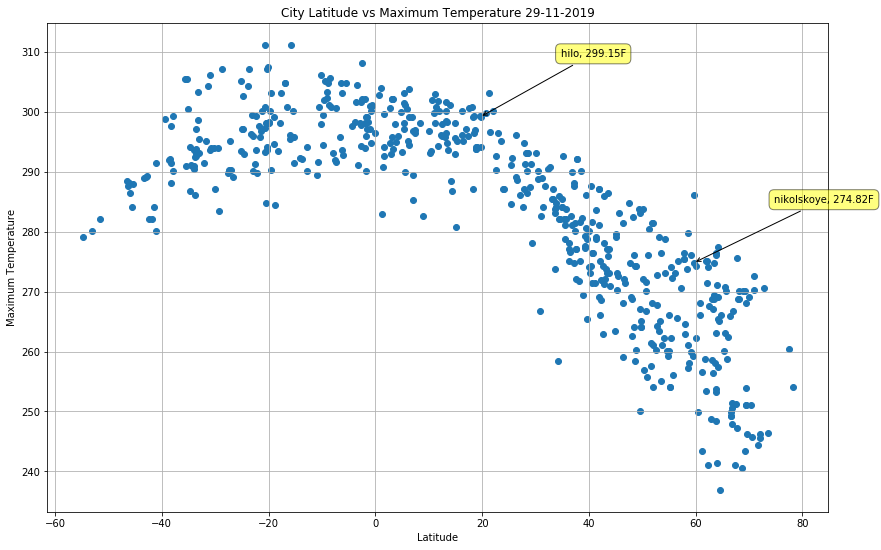

In [192]:
import datetime
d = datetime.datetime.today()
date = d.strftime('%d-%m-%Y')


plot, ax = plt.subplots(1, figsize = (14,9))
plt.scatter(df1['Lat'],df1['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title(f"City Latitude vs Maximum Temperature {date}")
ax.grid(b=None, which='major')

input_city = input(f"Choose a US city from the following cities available: {us_list[0:5]}")
for index, row in df1.iterrows():
    if df1["City"][index] == input_city:
        input_city = df1["City"][index]
        grove_temp = df1["Max Temp"][index]
        ax.annotate(f"{input_city}, {grove_temp}F",
                    (df1['Lat'][index], df1['Max Temp'][index]),
                    xytext=((df1['Lat'][index]+15, df1['Max Temp'][index]+10)),
                    arrowprops=dict(arrowstyle = '->'),
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))   
        
input_city = input(f"Choose a Russian city from the following cities available: {ru_list[0:4]}")
for index, row in df1.iterrows():
    if df1["City"][index] == input_city:
        input_city = df1["City"][index]
        grove_temp = df1["Max Temp"][index]
        ax.annotate(f"{input_city}, {grove_temp}F",
                    (df1['Lat'][index], df1['Max Temp'][index]),
                    xytext=((df1['Lat'][index]+15, df1['Max Temp'][index]+10)),
                    arrowprops=dict(arrowstyle = '->'),
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    
plt.show()

#### Latitude vs. Humidity Plot

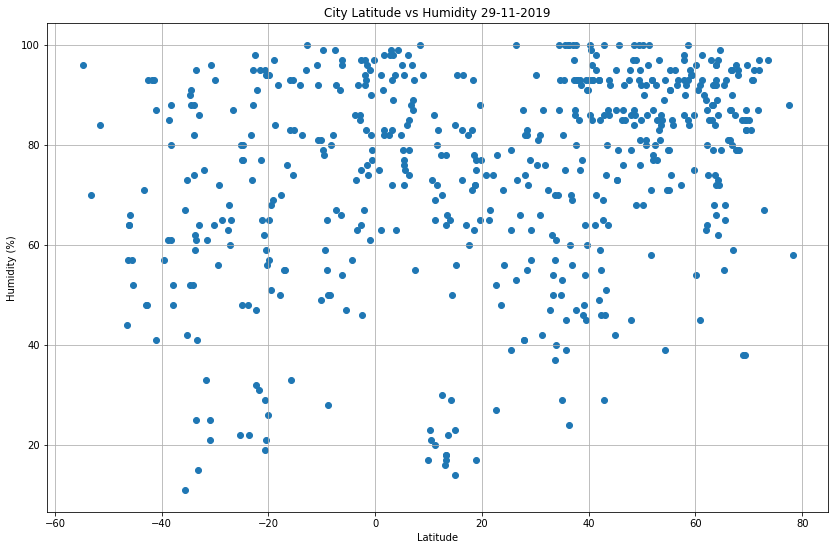

In [193]:
plot, ax = plt.subplots(1, figsize = (14,9))
plt.scatter(df1['Lat'],df1['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date}")
ax.grid(b=None, which='major')

#### Latitude vs. Cloudiness Plot

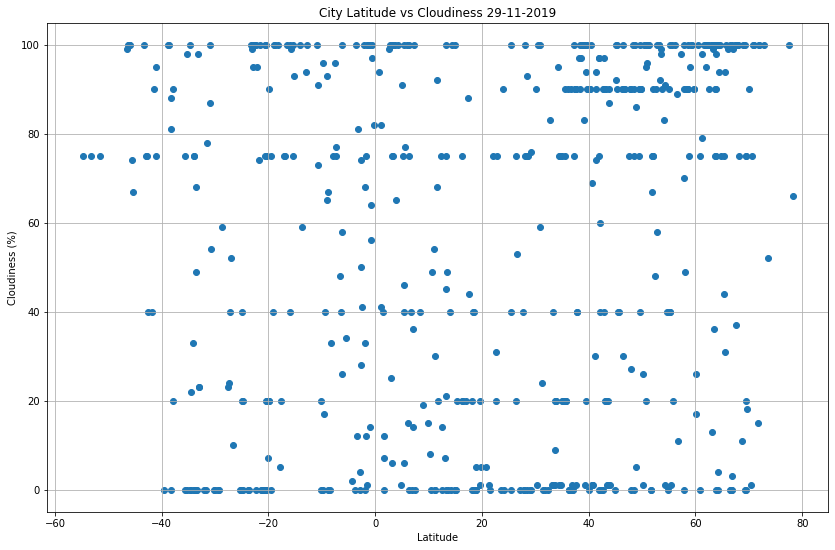

In [195]:
plot, ax = plt.subplots(1, figsize = (14,9))
plt.scatter(df1['Lat'],df1['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date}")
ax.grid(b=None, which='major')

#### Latitude vs. Wind Speed Plot

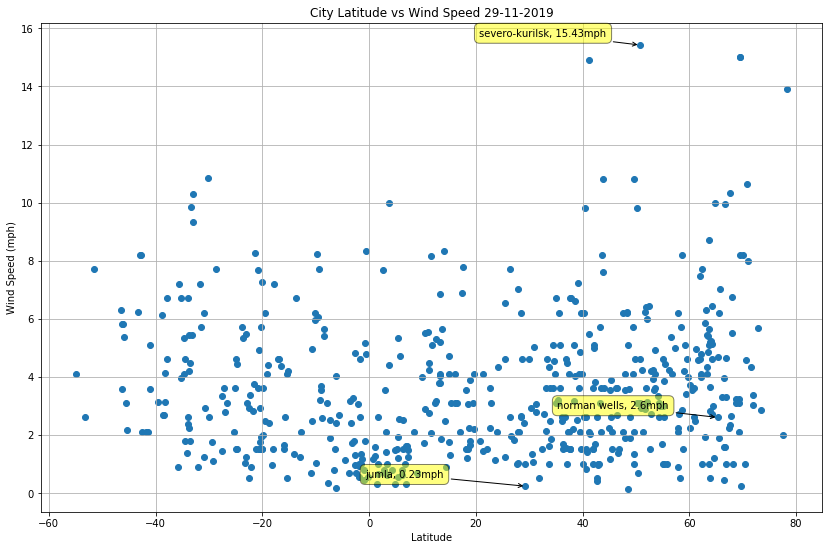

In [221]:
plot, ax = plt.subplots(1, figsize = (14,9))
plt.scatter(df1['Lat'],df1['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed {date}")
ax.grid(b=None, which='major')

max_wind = 0
for index, row in df1.iterrows():
    if df1["Wind Speed"][index] > max_wind:
        max_wind = df1["Wind Speed"][index]
        wind_city = df1["City"][index]
        ax.annotate(f"{wind_city}, {max_wind}mph",
                    (df1['Lat'][index], df1['Wind Speed'][index]),
                    xytext=((df1['Lat'][index]-30, df1['Wind Speed'][index]+0.3)),
                    arrowprops=dict(arrowstyle = '->'),
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))